# AnalyzeEDGBWaveforms.ipynb

Maria Okounkova (mokounkova@pasadena.edu)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

from datetime import datetime
datestr = datetime.now().strftime('%m-%d-%y')

import getpass
uname = getpass.getuser()
figtype = "notebook"
plt.style.use('default')
import scienceplots
if uname == 'darkknight':
    if figtype == "notebook":
        plt.style.use(['science','ieee','notebook'])
        plt.rcParams.update({'figure.dpi': 185/1.75/1.5})
    else:
        plt.style.use(['science','ieee'])
        plt.rcParams.update({'figure.dpi': 185/1.75})
elif uname == 'brian':
    if figtype == "notebook":
        plt.style.use(['science','ieee','notebook'])
        plt.rcParams.update({'figure.dpi': 185/1.75/1.5})
    else:
        plt.style.use(['science','ieee'])
        plt.rcParams.update({'figure.dpi': 254})
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
plt.rcParams.update({'font.serif': 'Times', 'font.family' : 'DeJavu Serif'})

### Helper functions

Functions for computing and subtracting peak times

In [2]:
def GetPeakTime(time, data): 
    """ Grab the peak time of some data """
    t_peak = time[np.argmax(data)]
    return t_peak

def SubtractPeakTime(time, data): 
    """ Subtract the peak time of some data """
    t_peak = GetPeakTime(time, data)
    return time - t_peak

### Read in the waveforms

In [3]:
## Read in the extrapolated modes
def ReadWaveformModes(file, mode_l = '2', mode_m = '2'):
    """ 
        File is the file containing the extrapolated waveform that we want to read in 
        mode_l is the l spin-weighted spherical harmonic mode of the waveform that we would like (default l = 2), 
        and mode_m is the m spin-weighted spherical harmonic mode that we would like (default m = 2)
    """

    ## Read in the data
    f = h5py.File(file, 'r')
    
    ## grab the length of the waveform first
    data = f['Extrapolated_N2.dir']['Y_l' + mode_l + '_m' + mode_m + '.dat']
    time = np.array(data[:,0])
    
    ## Real and imaginary parts of the waveform
    data_real = np.array(data[:,1])
    data_imag = np.array(data[:,2])
    
    ## Now subtract off the peak time
    amp = np.sqrt(data_real**2 + data_imag**2)
    time = time - time[np.argmax(amp)]

    return time, data_real, data_imag
    

### Plot the waveforms we want

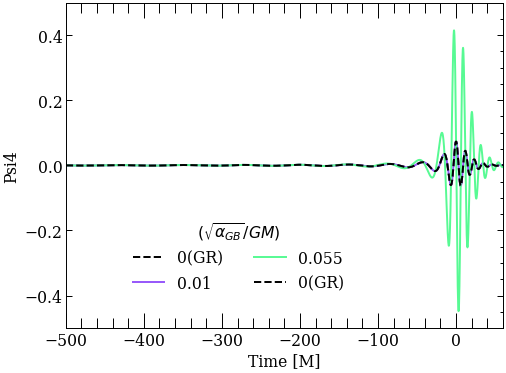

In [4]:
# plt.rcParams["font.family"] = "Cambria"
# plt.figure(figsize=(12, 8))



## Edit to include the file that you want
time0p0, data_real0p0, data_imag0p0 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p0.h5')
time0p01, data_real0p01, data_imag0p01 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p01.h5')
time0p02, data_real0p02, data_imag0p02 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p02.h5')
time0p03, data_real0p03, data_imag0p03 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p03.h5')
time0p04, data_real0p04, data_imag0p04 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p04.h5')
time0p045, data_real0p045, data_imag0p045 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p045.h5')
time0p05, data_real0p05, data_imag0p05 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p05.h5')
time0p055, data_real0p055, data_imag0p055 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p055.h5')
    
plt.plot(time0p0, data_real0p0, linestyle='--', color='Black', label='0(GR)') 
plt.plot(time0p01 + time0p0[0]-time0p01[0], data_real0p01, color='#9657fa', label='0.01')
# plt.plot(time0p02+ time0p0[0]-time0p02[0], data_real0p02, color='#5d57fa', label='0.02')
# plt.plot(time0p03+ time0p0[0]-time0p03[0], data_real0p03, color='#578efa', label='0.03')
# plt.plot(time0p04+ time0p0[0]-time0p04[0], data_real0p04, color='#57bcfa', label='0.04')
# plt.plot(time0p045+ time0p0[0]-time0p045[0], data_real0p045, color='#57f7fa', label='0.045')
# plt.plot(time0p05+ time0p0[0]-time0p05[0], data_real0p05, color='#57facc', label='0.05')
plt.plot(time0p055+ time0p0[0]-time0p055[0], data_real0p055, color='#57fa93', label='0.055')
plt.plot(time0p0, data_real0p0, linestyle='--', color='Black', label='0(GR)') 

plt.legend(loc='lower left', 
           ncol=2, borderpad=1,
           bbox_to_anchor=(0.1,0.04), 
           frameon=False, 
           title=r'$(\sqrt{\alpha_{GB}}/GM)$')
plt.minorticks_on()
plt.tick_params(axis='y', which='minor', left=False)
plt.tick_params(axis='x', which='minor', direction='in', length=10, top=True)
plt.tick_params(axis='x', which='major', direction='in', length=15, top=True)
plt.xlim([-500,60])
plt.ylim([-.5,.5])
# plt.ylim([-0.02,.02])
plt.xlabel('Time [M]')
plt.ylabel('Psi4')
plt.show()

0.0
0.0
0.0
0.0
0.0
0.0


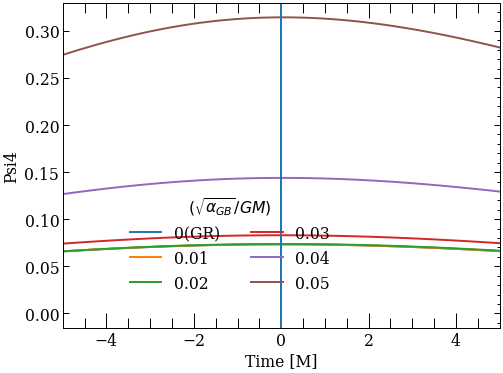

In [5]:
# plt.rcParams["font.family"] = "Cambria"
# plt.figure(figsize=(12, 8))



## Edit to include the file that you want
time0p0, data_real0p0, data_imag0p0 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p0.h5')
time0p01, data_real0p01, data_imag0p01 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p01.h5')
time0p02, data_real0p02, data_imag0p02 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p02.h5')
time0p03, data_real0p03, data_imag0p03 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p03.h5')
time0p04, data_real0p04, data_imag0p04 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p04.h5')
time0p045, data_real0p045, data_imag0p045 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p045.h5')
time0p05, data_real0p05, data_imag0p05 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p05.h5')
time0p055, data_real0p055, data_imag0p055 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p055.h5')

t,p1,p2  = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p0.h5')
plt.plot(t, np.abs(p1+1j*p2), label='0(GR)') 
print(t[np.argmax(np.abs(p1+1j*p2))])
plt.axvline(x = t[np.argmax(np.abs(p1+1j*p2))])
t,p1,p2  = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p01.h5')
plt.plot(t, np.abs(p1+1j*p2), label='0.01') 
print(t[np.argmax(np.abs(p1+1j*p2))])
plt.axvline(x = t[np.argmax(np.abs(p1+1j*p2))])
t,p1,p2  = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p02.h5')
plt.plot(t, np.abs(p1+1j*p2), label='0.02') 
print(t[np.argmax(np.abs(p1+1j*p2))])
plt.axvline(x = t[np.argmax(np.abs(p1+1j*p2))])
t,p1,p2  = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p03.h5')
plt.plot(t, np.abs(p1+1j*p2), label='0.03') 
print(t[np.argmax(np.abs(p1+1j*p2))])
plt.axvline(x = t[np.argmax(np.abs(p1+1j*p2))])
t,p1,p2  = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p04.h5')
plt.plot(t, np.abs(p1+1j*p2), label='0.04') 
print(t[np.argmax(np.abs(p1+1j*p2))])
plt.axvline(x = t[np.argmax(np.abs(p1+1j*p2))])
t,p1,p2  = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p05.h5')
plt.plot(t, np.abs(p1+1j*p2), label='0.05') 
print(t[np.argmax(np.abs(p1+1j*p2))])
plt.axvline(x = t[np.argmax(np.abs(p1+1j*p2))])

plt.legend(loc='lower left', 
           ncol=2, borderpad=1,
           bbox_to_anchor=(0.1,0.04), 
           frameon=False, 
           title=r'$(\sqrt{\alpha_{GB}}/GM)$')
plt.minorticks_on()
plt.tick_params(axis='y', which='minor', left=False)
plt.tick_params(axis='x', which='minor', direction='in', length=10, top=True)
plt.tick_params(axis='x', which='major', direction='in', length=15, top=True)
plt.xlim([-5,5])
# plt.ylim([-.5,.5])
plt.xlabel('Time [M]')
plt.ylabel('Psi4')
plt.show()

In [6]:
from scipy.fft import fft, ifft, fftfreq, fftshift
import warnings
def gethf_old(tt_orig, dt, psi4_orig, tzero_l,ttaper_l,ttaper_r):
    T_tot = tt_orig[-1]-tt_orig[0]
    N = np.int64(np.round(T_tot/dt))
    tt = np.arange(N) *dt + tt_orig[0]
    psi4 = np.interp(tt, tt_orig, psi4_orig)

    tzero_l = 200
    ttaper_l, ttaper_r = 300, 50
    nzero_l = np.int64(np.round(tzero_l/dt))
    ntaper_l = np.int64(np.round(ttaper_l/dt))
    ntaper_r = np.int64(np.round(ttaper_r/dt))

    psi4[:nzero_l] = 0 

    w_l = 0.5 - 0.5 * np.cos(np.arange(ntaper_l) *np.pi / ntaper_l)
    psi4[nzero_l:ntaper_l+nzero_l] = psi4[nzero_l:ntaper_l+nzero_l] * w_l
    w_r = 0.5 - 0.5 * np.cos(np.arange(ntaper_r) *np.pi / ntaper_r)
    psi4[-ntaper_r:] = psi4[-ntaper_r:]*np.flip(w_r)

    idx = np.argmax(np.abs(psi4))
    psi4_shifted = np.concatenate((psi4[idx:],psi4[:idx]))

    psi4f = fft(psi4_shifted)
    f = fftfreq(N,dt)

    import warnings
    with warnings.catch_warnings():
        warnings.filterwarnings(action="ignore",category=RuntimeWarning)
        hf = -psi4f/f**2 
        hf[0] = 0
    
    return f, hf

from scipy.interpolate import interp1d
from scipy.integrate import quad

def import_and_condition(tt_orig,x_orig, dt=1, tzero_l = 200, ttaper_l = 1000, ttaper_r = 50,t_pad = 50000):
    T_tot = tt_orig[-1]-tt_orig[0]
    N = np.int64(np.round(T_tot/dt))
    tt = np.arange(N) *dt + tt_orig[0]

    x_real_fun = interp1d(tt_orig, x_orig.real, kind='cubic', bounds_error=False, fill_value=0.0)
    x_imag_fun = interp1d(tt_orig, x_orig.imag, kind='cubic', bounds_error=False, fill_value=0.0)
    x = x_real_fun(tt) + 1j * x_imag_fun(tt)


    nzero_l = np.int64(np.round(tzero_l/dt))
    ntaper_l = np.int64(np.round(ttaper_l/dt))
    ntaper_r = np.int64(np.round(ttaper_r/dt))
    n_pad = np.int64(np.round(t_pad/dt))

    x_pad = np.concatenate((x,np.zeros(n_pad)))
    tt_pad = np.concatenate((tt, np.arange(n_pad)*dt + tt[-1]))

    x_pad[:nzero_l] = 0 

    w_l = 0.5 - 0.5 * np.cos(np.arange(ntaper_l) *np.pi / ntaper_l)
    x_pad[nzero_l:ntaper_l+nzero_l] = x_pad[nzero_l:ntaper_l+nzero_l] * w_l
    if ntaper_r > 0:
        w_r = 0.5 - 0.5 * np.cos(np.arange(ntaper_r) *np.pi / ntaper_r)
        x_pad[-(ntaper_r+n_pad):-n_pad] = x_pad[-(ntaper_r+n_pad):-n_pad]*np.flip(w_r)

    dct = {"tend" :tt[-1], "dt" : dt, "tzero_l" : tt_pad[nzero_l], "ttaper_l2" : tt_pad[nzero_l+ntaper_l], "ttaper_r1" : tt_pad[-(ntaper_r+n_pad)], "ttaper_r2" : tt_pad[-(n_pad)]}
    return tt_pad, x_pad, dct

import warnings

def gethf(tt,x,f0=0.002,wfilter=True):
    dt = tt[1]-tt[0]
    idx = np.argmax(np.abs(x))
    x_shifted = np.concatenate((x[idx:],x[:idx]))

    xf = fft(x_shifted)
    f = fftfreq(len(tt),dt)

    if wfilter:
        f0 = 0.002
        F = np.abs(f)
        ind = np.where(F<f0)
        ftest = f.copy()
        ftest[ind] = f0*np.sign(f[ind])
        with warnings.catch_warnings():
            warnings.filterwarnings(action="ignore",category=RuntimeWarning)
            h22f = xf/(2*np.pi*ftest)**2
            h22f[0] = 0
        # plt.plot(fftshift(f), np.abs(xf)/(2*np.pi*f )**2)
        h22est = ifft(h22f)
        h22est = np.concatenate((h22est[len(tt)-idx:],h22est[:len(tt)-idx]))
    else:
        with warnings.catch_warnings():
            warnings.filterwarnings(action="ignore",category=RuntimeWarning)
            h22f = xf/(2*np.pi*f)**2
            h22f[0] = 0
        h22est = ifft(h22f)
        h22est = np.concatenate((h22est[len(tt)-idx:],h22est[:len(tt)-idx]))
    return f, h22f, h22est

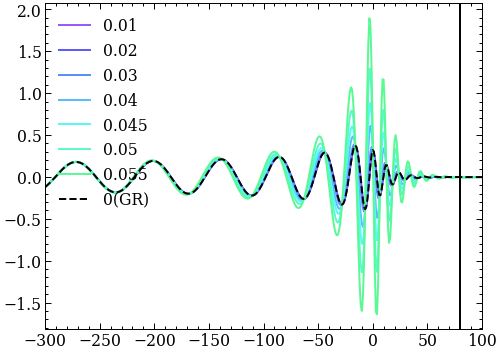

In [7]:
tt_gr, psi4_gr, dct_gr =  import_and_condition(time0p0, data_real0p0 + 1j* data_imag0p0)
f_gr, h22f_gr, h22t_gr = gethf(tt_gr, psi4_gr)
# plt.plot(tt, h22t.real, label='0(GR)',)
t0_gr = tt_gr[0]

tt_orig, data_real0p0, data_imag0p0 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p01.h5')
tt, psi4, dct =  import_and_condition(tt_orig, data_real0p0 + 1j* data_imag0p0)
f, h22f, h22t = gethf(tt, psi4)
Dt = -tt[0] + t0_gr
plt.plot(tt+Dt, h22t.real, color='#9657fa', label='0.01')

tt_orig, data_real0p0, data_imag0p0 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p02.h5')
tt, psi4, dct =  import_and_condition(tt_orig, data_real0p0 + 1j* data_imag0p0)
f, h22f, h22t = gethf(tt, psi4)
Dt = -tt[0] + t0_gr
plt.plot(tt+Dt, h22t.real, color='#5d57fa', label='0.02')

tt_orig, data_real0p0, data_imag0p0 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p03.h5')
tt, psi4, dct =  import_and_condition(tt_orig, data_real0p0 + 1j* data_imag0p0)
f, h22f, h22t = gethf(tt, psi4)
Dt = -tt[0] + t0_gr
plt.plot(tt+Dt, h22t.real, color='#578efa', label='0.03')

tt_orig, data_real0p0, data_imag0p0 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p04.h5')
tt, psi4, dct =  import_and_condition(tt_orig, data_real0p0 + 1j* data_imag0p0)
f, h22f, h22t = gethf(tt, psi4)
Dt = -tt[0] + t0_gr
plt.plot(tt+Dt, h22t.real, color='#57bcfa', label='0.04')

tt_orig, data_real0p0, data_imag0p0 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p045.h5')
tt, psi4, dct =  import_and_condition(tt_orig, data_real0p0 + 1j* data_imag0p0)
f, h22f, h22t = gethf(tt, psi4)
Dt = -tt[0] + t0_gr
plt.plot(tt+Dt, h22t.real, color='#57f7fa', label='0.045')

tt_orig, data_real0p0, data_imag0p0 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p05.h5')
tt, psi4, dct =  import_and_condition(tt_orig, data_real0p0 + 1j* data_imag0p0)
f, h22f, h22t = gethf(tt, psi4)
Dt = -tt[0] + t0_gr
plt.plot(tt+Dt, h22t.real, color='#57facc', label='0.05')

tt_orig, data_real0p0, data_imag0p0 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p055.h5')
tt, psi4, dct =  import_and_condition(tt_orig, data_real0p0 + 1j* data_imag0p0)
f, h22f, h22t = gethf(tt, psi4)
Dt = -tt[0] + t0_gr
plt.plot(tt+Dt, h22t.real, color='#57fa93', label='0.055')


plt.plot(tt_gr, h22t_gr.real, label='0(GR)',c="k", ls = "--")


plt.axvline(x = dct["tzero_l"],c="k")
plt.axvline(x = dct["ttaper_l2"],c="k")
plt.axvline(x = dct["ttaper_r1"],c="k")
plt.axvline(x = dct["ttaper_r2"],c="k")
# plt.xlim([tt[0],tt[0]+1000])
# plt.ylim(-0.1,0.1)
plt.xlim(right = 100,left = -300)
plt.legend(loc=2)

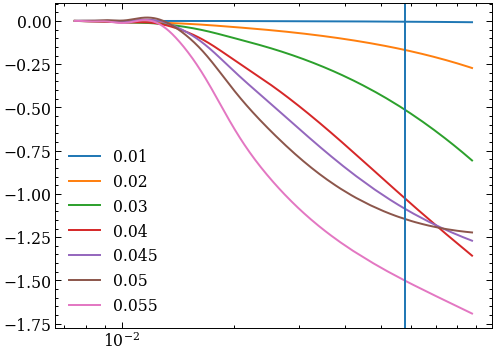

In [27]:
def get_dpsi(str = 'GW150914_Waveforms/EDGB_Psi4_0p01.h5'):
    idx = np.argmin((tt_gr- dct_gr["ttaper_l2"])**2)
    phi = np.unwrap(np.angle(h22t_gr))
    omega = np.gradient(phi,tt_gr[1]-tt_gr[0])
    fmin = -omega[idx]/(2*np.pi)
    idx = np.argmin((tt_gr- 20)**2)
    fmax = -omega[idx]/(2*np.pi)

    F = fftshift(f_gr)
    h22f_gr_flip = np.flip(fftshift(h22f_gr))
    i1 = np.argmin((F - fmin)**2)
    i2 = np.argmin((F - fmax)**2)
    psi_gr = np.unwrap(np.angle(h22f_gr_flip)[i1:i2] )
    F = F[i1:i2]


    tt_orig, data_real0p0, data_imag0p0 = ReadWaveformModes(str)
    tt, psi4, dct =  import_and_condition(tt_orig, data_real0p0 + 1j* data_imag0p0)
    f, h22f, h22t = gethf(tt, psi4)
    Dt = -tt[0] + t0_gr

    F = fftshift(f)
    h22_flip = np.flip(fftshift(h22f))
    i1 = np.argmin((F - fmin)**2)
    i2 = np.argmin((F - fmax)**2)
    psi = np.unwrap(np.angle(h22_flip)[i1:i2] )
    F = F[i1:i2]
    dpsi = psi - psi_gr + 2*np.pi*F*Dt
    dpsi = dpsi - dpsi[0]
    return F, dpsi

F, dpsi = get_dpsi(str = 'GW150914_Waveforms/EDGB_Psi4_0p01.h5')
plt.plot(F,dpsi, label = '0.01')
F, dpsi = get_dpsi(str = 'GW150914_Waveforms/EDGB_Psi4_0p02.h5')
plt.plot(F,dpsi, label = '0.02')
F, dpsi = get_dpsi(str = 'GW150914_Waveforms/EDGB_Psi4_0p03.h5')
plt.plot(F,dpsi, label = '0.03')
F, dpsi = get_dpsi(str = 'GW150914_Waveforms/EDGB_Psi4_0p04.h5')
plt.plot(F,dpsi, label = '0.04')
F, dpsi = get_dpsi(str = 'GW150914_Waveforms/EDGB_Psi4_0p045.h5')
plt.plot(F,dpsi, label = '0.045')
F, dpsi = get_dpsi(str = 'GW150914_Waveforms/EDGB_Psi4_0p05.h5')
plt.plot(F,dpsi, label = '0.05')
F, dpsi = get_dpsi(str = 'GW150914_Waveforms/EDGB_Psi4_0p055.h5')
plt.semilogx(F,dpsi, label = '0.055')
plt.axvline(x= 0.058)
plt.legend(loc=3)

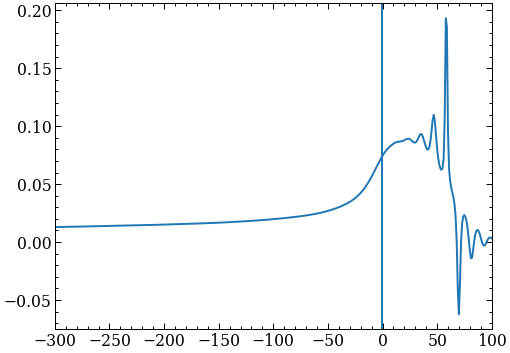

In [20]:
idx = np.argmin((tt_gr- dct_gr["ttaper_l2"])**2)
phi = np.unwrap(np.angle(h22t_gr))
omega = np.gradient(phi,tt_gr)
fmin = -omega[idx]/(2*np.pi)
idx = np.argmin((tt_gr- 20)**2)
fmax = -omega[idx]/(2*np.pi)

plt.plot(tt_gr, -omega/(2*np.pi))
plt.xlim(-300,100)

i = np.argmin((-omega[tt_gr<0]/(2*np.pi)-2* 0.042)**2)
plt.axvline(x=tt_gr[i])


In [25]:
i = np.argmax(np.abs(h22t_gr))
tt_gr[i], -omega[i]/(2*np.pi)

(-9.089599609375, 0.058058443225313415)

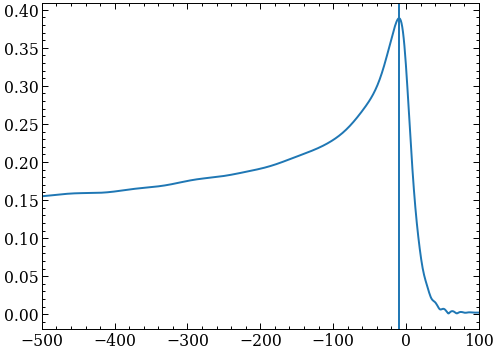

In [26]:
plt.plot(tt_gr, np.abs(h22t_gr))
plt.xlim(-500,100)
plt.axvline(x=tt_gr[i])

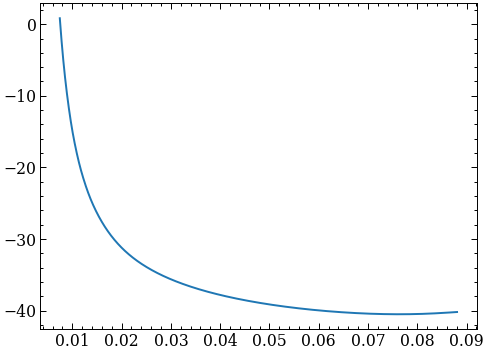

In [180]:
F = fftshift(f_gr)
h22f_gr_flip = np.flip(fftshift(h22f_gr))
i1 = np.argmin((F - fmin)**2)
i2 = np.argmin((F - fmax)**2)
psi_gr = np.unwrap(np.angle(h22f_gr_flip)[i1:i2] )
F = F[i1:i2]
plt.plot(F,psi_gr)

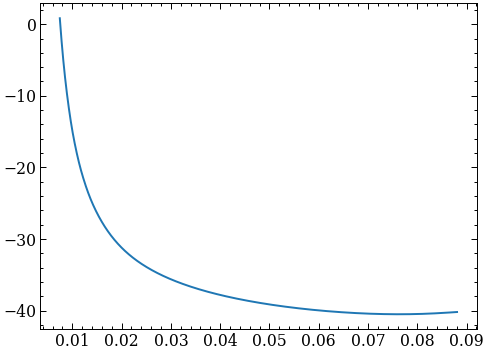

In [184]:
tt_orig, data_real0p0, data_imag0p0 = ReadWaveformModes('GW150914_Waveforms/EDGB_Psi4_0p055.h5')
tt, psi4, dct =  import_and_condition(tt_orig, data_real0p0 + 1j* data_imag0p0)
f, h22f, h22t = gethf(tt, psi4)
Dt = -tt[0] + t0_gr

F = fftshift(f)
h22_flip = np.flip(fftshift(h22f))
i1 = np.argmin((F - fmin)**2)
i2 = np.argmin((F - fmax)**2)
psi = np.unwrap(np.angle(h22_flip)[i1:i2] )
F = F[i1:i2]
plt.plot(F,psi)

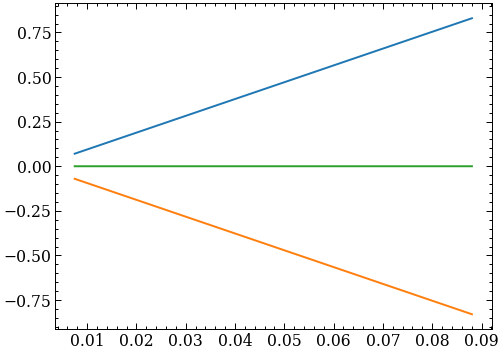

In [185]:
plt.plot(F,psi - psi_gr + 2*np.pi*F*Dt)
plt.plot(F,psi - psi_gr - 2*np.pi*F*Dt)
plt.plot(F,psi - psi_gr )

(-0.02, 0.3)

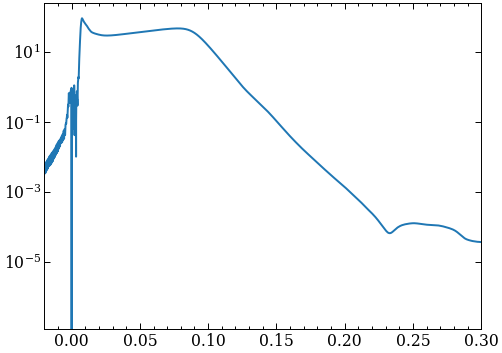

In [186]:
plt.semilogy(fftshift(f_gr), np.abs(np.flip(fftshift(h22f_gr))))
plt.xlim(-0.02,0.3)

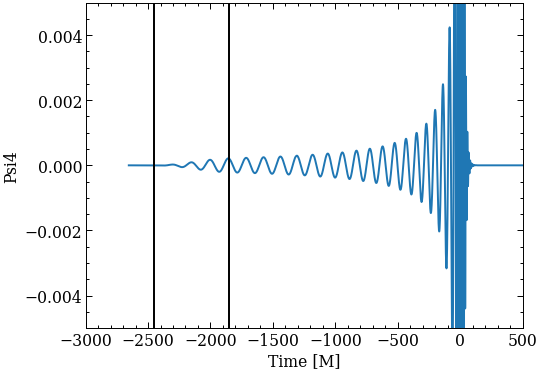

In [407]:


psi4_orig =  data_real0p0 + 1j* data_imag0p0
tt_orig = time0p0


# ntaper = np.int64(np.round(textra_taper/dt))
# w = 0.5 - 0.5 * np.cos(np.arange(ntaper) *np.pi / ntaper)




dt = 0.1
T_tot = tt_orig[-1]-tt_orig[0]
N = np.int64(np.round(T_tot/dt))
tt = np.arange(N) *dt + tt_orig[0]
psi4_real_fun = interp1d(tt_orig, psi4_orig.real, kind='cubic', bounds_error=False, fill_value=0.0)
psi4_imag_fun = interp1d(tt_orig, psi4_orig.imag, kind='cubic', bounds_error=False, fill_value=0.0)

psi4 = psi4_real_fun(tt) + 1j * psi4_imag_fun(tt)




tzero_l = 200
ttaper_l, ttaper_r = 600, 50
t_pad = 5000
nzero_l = np.int64(np.round(tzero_l/dt))
ntaper_l = np.int64(np.round(ttaper_l/dt))
ntaper_r = np.int64(np.round(ttaper_r/dt))
n_pad = np.int64(np.round(t_pad/dt))

psi4 = np.concatenate((psi4,np.zeros(n_pad)))
tt = np.concatenate((tt, np.arange(n_pad)*dt + tt[-1]))


psi4[:nzero_l] = 0 

w_l = 0.5 - 0.5 * np.cos(np.arange(ntaper_l) *np.pi / ntaper_l)
psi4[nzero_l:ntaper_l+nzero_l] = psi4[nzero_l:ntaper_l+nzero_l] * w_l
w_r = 0.5 - 0.5 * np.cos(np.arange(ntaper_r) *np.pi / ntaper_r)
psi4[-ntaper_r:] = psi4[-ntaper_r:]*np.flip(w_r)


plt.plot(tt, np.real(psi4))
plt.axvline(x = tt[0]+tzero_l,c="k")
plt.axvline(x = tt[0]+tzero_l+ttaper_l,c="k")
plt.axvline(x = tt[-1]-ttaper_r,c="k")
plt.ylim(-0.01/2,0.01/2)
plt.xlim(-3000,500)
plt.xlabel('Time [M]')
plt.ylabel('Psi4')
# plt.savefig(datestr + "-psi4-conditioned.pdf")
plt.show()

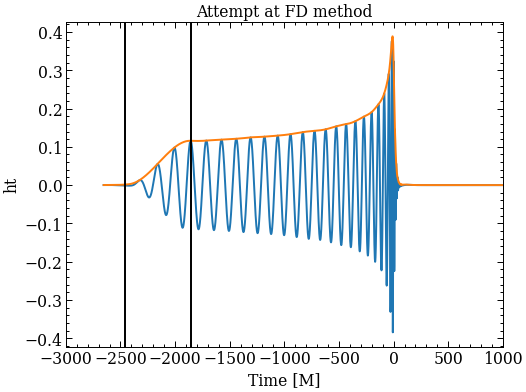

In [410]:
from scipy.fft import fft, ifft, fftfreq
import warnings

idx = np.argmax(np.abs(psi4))
psi4_shifted = np.concatenate((psi4[idx:],psi4[:idx]))

psi4f = fft(psi4_shifted)
f = fftfreq(len(tt),dt)


with warnings.catch_warnings():
    warnings.filterwarnings(action="ignore",category=RuntimeWarning)
    f0 = 4e-3
    ind = np.where(np.abs(f)<f0)
    ftest = f.copy()
    ftest[ind] = f0*np.sign(f[ind])
    hf = psi4f/(2*np.pi*ftest)**2 
    hf[0] = 0

if len(tt)%2 == 0:
    hf[len(tt)//2+1] = 0

ht = ifft(hf)
# ht = np.concatenate((ht[N-idx:],ht[:N-idx]))

# coeffs_real = np.polyfit(tt, ht.real, deg=2)
# trend_real = np.polyval(coeffs_real, tt)
# h_real_detrended = ht.real - trend_real
# h_real_detrended = np.concatenate((h_real_detrended[len(tt)-idx:],h_real_detrended[:len(tt)-idx]))
# plt.plot(tt,h_real_detrended)
h = np.concatenate((ht[len(tt)-idx:],ht[:len(tt)-idx]))
ht_real = ht.real
ht_real = np.concatenate((ht_real[len(tt)-idx:],ht_real[:len(tt)-idx]))
plt.plot(tt,ht_real)
plt.plot(tt,np.abs(h))
plt.axvline(x = tt[0]+tzero_l,c="k")
plt.axvline(x = tt[0]+tzero_l+ttaper_l,c="k")
plt.axvline(x = tt[-1]-ttaper_r,c="k")
plt.xlim(-3000,1000)
plt.xlabel('Time [M]')
plt.ylabel('ht')
plt.title('Attempt at FD method')
# plt.savefig(datestr + "-ht-fd.pdf")
plt.show()

/tmp/ipykernel_1889863/3705033220.py:9: RuntimeWarning: divide by zero encountered in divide
  plt.semilogy(-fftshift(f),np.abs( fftshift(psi4f/(2*np.pi*f)**2)))
/tmp/ipykernel_1889863/3705033220.py:13: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(-0.01,0.5)


(7.572745869719686e-05, 0.5)

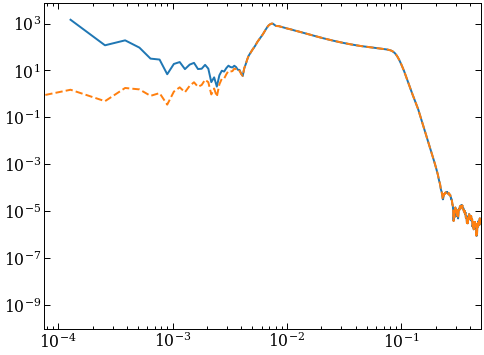

In [411]:



with warnings.catch_warnings():
    warnings.filterwarnings(action="ignore",category=RuntimeWarning)
    f0 = 4e-3
    ftest = np.where((f > 0) & (f < f0), f0, np.where((f < 0) & (f > -f0), -f0, f))
    hf = -psi4f/(2*np.pi*ftest)**2 
    hf[0] = 0
    hf[-1]

plt.semilogy(-fftshift(f),np.abs( fftshift(psi4f/(2*np.pi*f)**2)))
plt.loglog(-fftshift(f), np.abs(fftshift(hf)),"--")

# plt.plot(f,np.abs( -psi4f/(2*np.pi*f)**2 ))
plt.xlim(-0.01,0.5)

## FFT Psi

In [346]:
import matplotlib.pyplot as plt
import numpy as np
import sxs

sxs_bbh_1234 = sxs.load("SXS:BBH:1234")
sxs_bbh_1234 = sxs.load("SXS:BBH:2325")
h = sxs_bbh_1234.h
psi4 = sxs_bbh_1234.psi4


In [347]:
def import_and_condition(tt_orig,x_orig, dt=1, tzero_l = 200, ttaper_l = 1000, ttaper_r = 50,t_pad = 5000):
    T_tot = tt_orig[-1]-tt_orig[0]
    N = np.int64(np.round(T_tot/dt))
    tt = np.arange(N) *dt + tt_orig[0]

    x_real_fun = interp1d(tt_orig, x_orig.real, kind='cubic', bounds_error=False, fill_value=0.0)
    x_imag_fun = interp1d(tt_orig, x_orig.imag, kind='cubic', bounds_error=False, fill_value=0.0)
    x = x_real_fun(tt) + 1j * x_imag_fun(tt)


    nzero_l = np.int64(np.round(tzero_l/dt))
    ntaper_l = np.int64(np.round(ttaper_l/dt))
    ntaper_r = np.int64(np.round(ttaper_r/dt))
    n_pad = np.int64(np.round(t_pad/dt))

    x_pad = np.concatenate((x,np.zeros(n_pad)))
    tt_pad = np.concatenate((tt, np.arange(n_pad)*dt + tt[-1]))

    x_pad[:nzero_l] = 0 

    w_l = 0.5 - 0.5 * np.cos(np.arange(ntaper_l) *np.pi / ntaper_l)
    x_pad[nzero_l:ntaper_l+nzero_l] = x_pad[nzero_l:ntaper_l+nzero_l] * w_l
    if ntaper_r > 0:
        w_r = 0.5 - 0.5 * np.cos(np.arange(ntaper_r) *np.pi / ntaper_r)
        x_pad[-(ntaper_r+n_pad):-n_pad] = x_pad[-(ntaper_r+n_pad):-n_pad]*np.flip(w_r)

    dct = {"tend" :tt[-1], "dt" : dt, "tzero_l" : tt_pad[nzero_l], "ttaper_l2" : tt_pad[nzero_l+ntaper_l], "ttaper_r1" : tt_pad[-(ntaper_r+n_pad)], "ttaper_r2" : tt_pad[-(n_pad)]}
    return tt_pad, x_pad, dct



In [383]:
tt_orig = h.t - h.max_norm_time()
h22_orig = np.array(h[:, h.index(2, 2)])
psi4_orig = np.array(psi4[:, h.index(2, 2)])
dt = 1

tt, h22, dct = import_and_condition(tt_orig,h22_orig,t_pad=5000,dt=dt)
_, psi422, dct = import_and_condition(tt_orig,psi4_orig,t_pad=5000,dt=dt)


x = psi422
idx = np.argmax(np.abs(x))
x_shifted = np.concatenate((x[idx:],x[:idx]))

xf = fft(x_shifted)
f = fftfreq(len(tt),dt)


f0 = 0.002
F = np.abs(f)
ind = np.where(F<f0)
ftest = f.copy()
ftest[ind] = f0*np.sign(f[ind])
Xf = xf/(2*np.pi*ftest)**2
Xf[0] = 0
# plt.plot(fftshift(f), np.abs(xf)/(2*np.pi*f )**2)
h22est = ifft(Xf)
h22est = np.concatenate((h22est[len(tt)-idx:],h22est[:len(tt)-idx]))

/tmp/ipykernel_1889863/2974565597.py:23: RuntimeWarning: divide by zero encountered in divide
  Xf = xf/(2*np.pi*ftest)**2


(-200.0, 50.0)

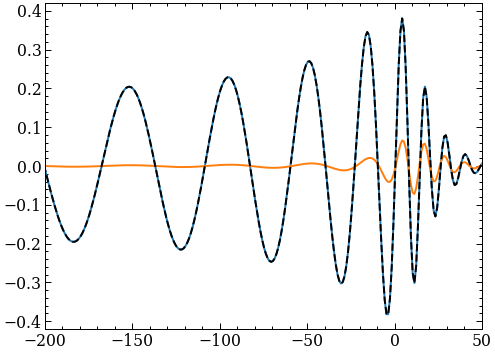

In [389]:
plt.plot(tt, h22.real)
plt.plot(tt, psi422.real)
plt.plot(tt, h22est.real,"k--")

plt.axvline(x = dct["tzero_l"],c="k")
plt.axvline(x = dct["ttaper_l2"],c="k")
plt.axvline(x = dct["ttaper_r1"],c="k")
plt.axvline(x = dct["ttaper_r2"],c="k")


# plt.axvline(x = tt[0]+tzero_l+ttaper_l,c="k")
# plt.axvline(x = tt[-1]-ttaper_r,c="k")
plt.xlim(-200,50)
# plt.ylim(-0.01,0.01)

/tmp/ipykernel_1889863/2468027796.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.plot(fftshift(f), np.abs(fftshift(xf))/(2*np.pi*fftshift(f) ))


(-0.01, 0.0)

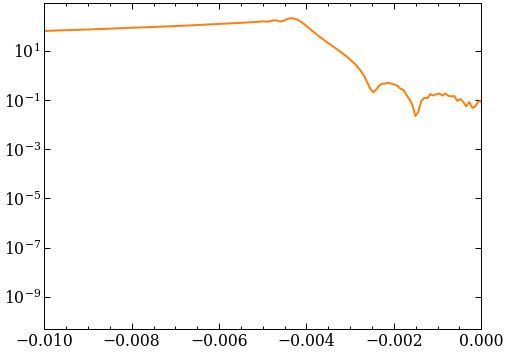

In [378]:
x = psi422
idx = np.argmax(np.abs(x))
x_shifted = np.concatenate((x[idx:],x[:idx]))

xf = fft(x_shifted)
f = fftfreq(len(tt),dt)

plt.plot(fftshift(f), np.abs(fftshift(xf))/(2*np.pi*fftshift(f) ))
# plt.plot(fftshift(f), np.abs(fftshift(xf))/(fftshift(f) ))


x = h22
idx = np.argmax(np.abs(x))
x_shifted = np.concatenate((x[idx:],x[:idx]))

xf = fft(x_shifted)
f = fftfreq(len(tt),dt)

plt.semilogy(fftshift(f), np.abs(fftshift(xf)))
plt.xlim(-0.01,0)

## Old

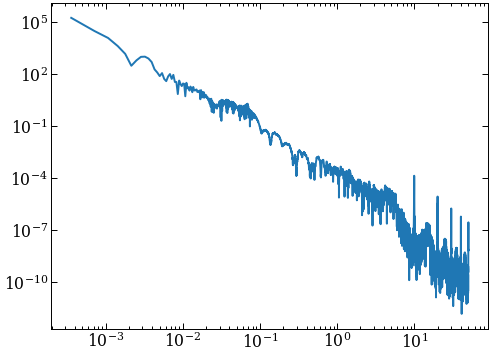

In [6]:
from scipy.fft import fft, ifft, fftfreq
import warnings
def gethf(tt_orig, dt, psi4_orig, tzero_l,ttaper_l,ttaper_r):
    T_tot = tt_orig[-1]-tt_orig[0]
    N = np.int64(np.round(T_tot/dt))
    tt = np.arange(N) *dt + tt_orig[0]
    psi4 = np.interp(tt, tt_orig, psi4_orig)

    tzero_l = 200
    ttaper_l, ttaper_r = 300, 50
    nzero_l = np.int64(np.round(tzero_l/dt))
    ntaper_l = np.int64(np.round(ttaper_l/dt))
    ntaper_r = np.int64(np.round(ttaper_r/dt))

    psi4[:nzero_l] = 0 

    w_l = 0.5 - 0.5 * np.cos(np.arange(ntaper_l) *np.pi / ntaper_l)
    psi4[nzero_l:ntaper_l+nzero_l] = psi4[nzero_l:ntaper_l+nzero_l] * w_l
    w_r = 0.5 - 0.5 * np.cos(np.arange(ntaper_r) *np.pi / ntaper_r)
    psi4[-ntaper_r:] = psi4[-ntaper_r:]*np.flip(w_r)

    idx = np.argmax(np.abs(psi4))
    psi4_shifted = np.concatenate((psi4[idx:],psi4[:idx]))

    psi4f = fft(psi4_shifted)
    f = fftfreq(N,dt)

    import warnings
    with warnings.catch_warnings():
        warnings.filterwarnings(action="ignore",category=RuntimeWarning)
        hf = -psi4f/f**2 
        hf[0] = 0
    
    return f, hf


psi4_orig =  data_real0p0 + 1j* data_imag0p0
tt_orig = time0p0
d = {"tt_orig":tt_orig, "dt": 0.01, "psi4_orig":psi4_orig, "tzero_l":200, "ttaper_l":300, "ttaper_r":50}
f, hf = gethf(**d)

ind = np.where(f>0)
plt.loglog(f[ind], np.abs(hf)[ind], label='0(GR)')
# plt.xlim()

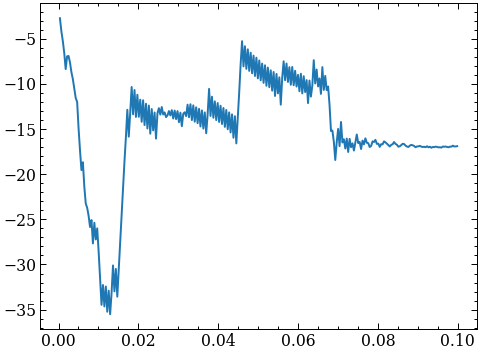

In [7]:
psi = np.unwrap(np.angle( hf[ind]))
F = f[ind]
pltind = np.where(F<0.1)
plt.plot(F[pltind], psi[pltind])
# plt.xlim(right = 0.1,left =0)

In [8]:
from scipy.integrate import quad

psi4_orig =  data_real0p0 + 1j* data_imag0p0
tt_orig = time0p0


# ntaper = np.int64(np.round(textra_taper/dt))
# w = 0.5 - 0.5 * np.cos(np.arange(ntaper) *np.pi / ntaper)

from scipy.interpolate import interp1d


dt = 0.1
T_tot = tt_orig[-1]-tt_orig[0]
N = np.int64(np.round(T_tot/dt))
tt = np.arange(N) *dt + tt_orig[0]
psi4_real_fun = interp1d(tt_orig, psi4_orig.real, kind='cubic', bounds_error=False, fill_value=0.0)
psi4_imag_fun = interp1d(tt_orig, psi4_orig.imag, kind='cubic', bounds_error=False, fill_value=0.0)

psi4 = psi4_real_fun(tt) + 1j * psi4_imag_fun(tt)




tzero_l = 200
ttaper_l, ttaper_r = 200, 50
t_pad = 50000*0
nzero_l = np.int64(np.round(tzero_l/dt))
ntaper_l = np.int64(np.round(ttaper_l/dt))
ntaper_r = np.int64(np.round(ttaper_r/dt))
n_pad = np.int64(np.round(t_pad/dt))

psi4 = np.concatenate((psi4,np.zeros(n_pad)))
tt = np.concatenate((tt, np.arange(n_pad)*dt + tt[-1]))


psi4[:nzero_l] = 0 

w_l = 0.5 - 0.5 * np.cos(np.arange(ntaper_l) *np.pi / ntaper_l)
psi4[nzero_l:ntaper_l+nzero_l] = psi4[nzero_l:ntaper_l+nzero_l] * w_l
w_r = 0.5 - 0.5 * np.cos(np.arange(ntaper_r) *np.pi / ntaper_r)
psi4[-ntaper_r:] = psi4[-ntaper_r:]*np.flip(w_r)



psi4_real_fun = interp1d(tt, psi4.real, kind='cubic', bounds_error=False, fill_value=0.0)
psi4_imag_fun = interp1d(tt, psi4.imag, kind='cubic', bounds_error=False, fill_value=0.0)
psi4fun = lambda t: psi4_real_fun(t) + 1j * psi4_imag_fun(t)

# integral = quad(lambda t: quad(psi4fun, 0, t)[0], lb, ub)[0]
def rhs_psi4(t, v):
    h, H = v
    return [H, -psi4fun(t)]

import scipy as sp
sol = sp.integrate.solve_ivp(rhs_psi4, [tt[-1], tt[0]], [0. + 0j,0. + 1j], t_eval = tt[::-1], rtol=1e-10, atol=1e-10)
# sol = sp.integrate.solve_ivp(rhs_psi4, [tt[0],tt[-1]], [0. + 0j,0. + 1j], t_eval = tt, rtol=1e-12, atol=1e-12)

In [9]:
h=sol.y[0]

coeffs_real = np.polyfit(tt, h.real, deg=1)
trend_real = np.polyval(coeffs_real, tt)
h_real_detrended = h.real - trend_real

/home/darkknight/anaconda3/envs/qmstruct/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


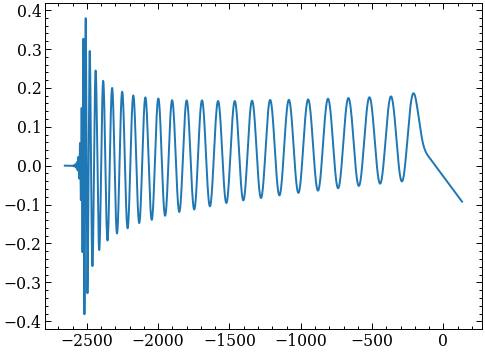

In [10]:
plt.plot(tt,sol.y[0])

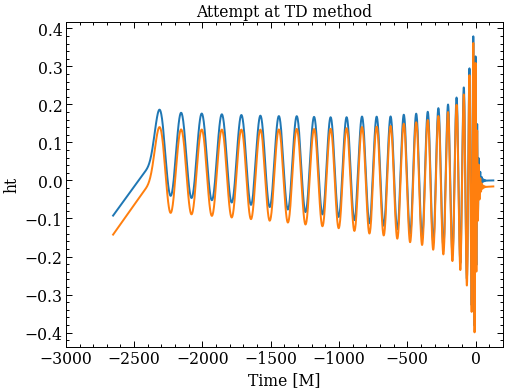

In [11]:
plt.plot(tt[::-1],np.real(h.real))
plt.plot(tt[::-1],np.real(h_real_detrended))
plt.xlim(-3000,200)
plt.xlabel('Time [M]')
plt.ylabel('ht')
plt.title('Attempt at TD method')
# plt.savefig(datestr + "-ht-td.pdf")
plt.show()

In [46]:
dt = 0.1
T_tot = tt_orig[-1]-tt_orig[0]
N = np.int64(np.round(T_tot/dt))
tt = np.arange(N) *dt + tt_orig[0]
psi4 = np.interp(tt, tt_orig, psi4_orig)



tzero_l = 200
ttaper_l, ttaper_r = 500, 50
t_pad = 500000
nzero_l = np.int64(np.round(tzero_l/dt))
ntaper_l = np.int64(np.round(ttaper_l/dt))
ntaper_r = np.int64(np.round(ttaper_r/dt))
n_pad = np.int64(np.round(t_pad/dt))


psi4[:nzero_l] = 0 

w_l = 0.5 - 0.5 * np.cos(np.arange(ntaper_l) *np.pi / ntaper_l)
psi4[nzero_l:ntaper_l+nzero_l] = psi4[nzero_l:ntaper_l+nzero_l] * w_l
w_r = 0.5 - 0.5 * np.cos(np.arange(ntaper_r) *np.pi / ntaper_r)
psi4[-ntaper_r:] = psi4[-ntaper_r:]*np.flip(w_r)

psi4 = np.concatenate((psi4,np.zeros(n_pad)))
tt = np.concatenate((tt, np.arange(n_pad)*dt + tt[-1]))


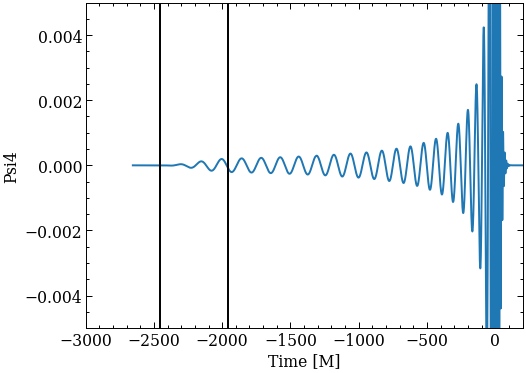

In [47]:
plt.plot(tt, np.real(psi4))
plt.axvline(x = tt[0]+tzero_l,c="k")
plt.axvline(x = tt[0]+tzero_l+ttaper_l,c="k")
plt.axvline(x = tt[-1]-ttaper_r,c="k")
plt.ylim(-0.01/2,0.01/2)
plt.xlim(-3000,200)
plt.xlabel('Time [M]')
plt.ylabel('Psi4')
# plt.savefig(datestr + "-psi4-conditioned.pdf")
plt.show()

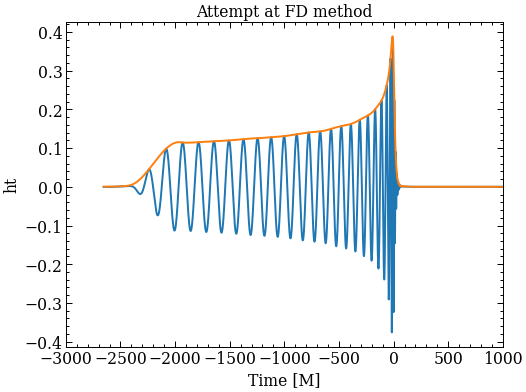

In [48]:
idx = np.argmax(np.abs(psi4))
psi4_shifted = np.concatenate((psi4[idx:],psi4[:idx]))

psi4f = fft(psi4_shifted)
f = fftfreq(len(tt),dt)


with warnings.catch_warnings():
    warnings.filterwarnings(action="ignore",category=RuntimeWarning)
    f0 = 4e-3
    ftest = np.where((f > 0) & (f < f0), f0, np.where((f < 0) & (f > -f0), -f0, f))
    hf = -psi4f/(2*np.pi*ftest)**2 
    hf[0] = 0
    hf[-1]

if len(tt)%2 == 0:
    hf[len(tt)//2+1] = 0

ht = ifft(hf)
# ht = np.concatenate((ht[N-idx:],ht[:N-idx]))

# coeffs_real = np.polyfit(tt, ht.real, deg=2)
# trend_real = np.polyval(coeffs_real, tt)
# h_real_detrended = ht.real - trend_real
# h_real_detrended = np.concatenate((h_real_detrended[len(tt)-idx:],h_real_detrended[:len(tt)-idx]))
# plt.plot(tt,h_real_detrended)
h = np.concatenate((ht[len(tt)-idx:],ht[:len(tt)-idx]))
ht_real = ht.real
ht_real = np.concatenate((ht_real[len(tt)-idx:],ht_real[:len(tt)-idx]))
plt.plot(tt,ht_real)
plt.plot(tt,np.abs(h))
plt.xlim(-3000,1000)
plt.xlabel('Time [M]')
plt.ylabel('ht')
plt.title('Attempt at FD method')
# plt.savefig(datestr + "-ht-fd.pdf")
plt.show()

In [25]:
f

array([ 0.00000000e+00,  1.89449195e-05,  3.78898391e-05, ...,
       -5.68347586e-05, -3.78898391e-05, -1.89449195e-05])